# 0. 데이터 확인 

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv("C:/Users/daum0/Downloads/카카오톡 받은 파일/주차난 프로젝트/중구 주차난 분석/car_all.csv")
df

,민원접수일,민원접수시간,경도,위도,_PARCEL_AD,_PARCEL_DT,_ROAD_AD,_ROAD_DT
0,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
1,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
2,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
3,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
4,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m
...,...,...,...,...,...,...,...,...
134529,20231031.0,23:55:00,127.009894,37.535221,서울특별시 용산구 한남동 31-5,0.0m,서울특별시 용산구 한남대로20길 47-10,0.0m
134530,20231031.0,23:56:00,126.865180,37.534377,서울특별시 양천구 목동 786-6,0.0m,서울특별시 양천구 목동중앙서로7나길 11,0.0m
134531,20231031.0,23:59:00,127.001042,37.506165,서울특별시 서초구 잠원동 76-5,0.0m,서울특별시 서초구 반포대로 304,0.0m
134532,20231031.0,23:59:00,127.005346,37.511840,서울특별시 서초구 잠원동 71-8,0.0m,서울특별시 서초구 신반포로23길 76,0.0m


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134534 entries, 0 to 134533
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   민원접수일       134534 non-null  float64
 1   민원접수시간      134534 non-null  object 
 2   경도          134534 non-null  float64
 3   위도          134534 non-null  float64
 4   _PARCEL_AD  134534 non-null  object 
 5   _PARCEL_DT  134534 non-null  object 
 6   _ROAD_AD    134534 non-null  object 
 7   _ROAD_DT    134534 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.2+ MB


In [4]:
df.shape

(134534, 8)

In [5]:
df.isnull().sum()

민원접수일         0
민원접수시간        0
경도            0
위도            0
_PARCEL_AD    0
_PARCEL_DT    0
_ROAD_AD      0
_ROAD_DT      0
dtype: int64

In [8]:
df.columns

Index(['민원접수일', '민원접수시간', '경도', '위도', '_PARCEL_AD', '_PARCEL_DT', '_ROAD_AD',
       '_ROAD_DT'],
      dtype='object')

---

# 01. _ROAD_AD 정리

In [18]:
df[['시', '구', '도로1', '도로2', '건물번호']] = df['_ROAD_AD'].str.split(' ', expand=True)
df

,민원접수일,민원접수시간,경도,위도,_PARCEL_AD,_PARCEL_DT,_ROAD_AD,_ROAD_DT,시,구,도로1,도로2,건물번호
0,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
1,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
2,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
3,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
4,20231001.0,0:00:00,126.981032,37.554950,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134529,20231031.0,23:55:00,127.009894,37.535221,서울특별시 용산구 한남동 31-5,0.0m,서울특별시 용산구 한남대로20길 47-10,0.0m,서울특별시,용산구,한남대로20길,47-10,None
134530,20231031.0,23:56:00,126.865180,37.534377,서울특별시 양천구 목동 786-6,0.0m,서울특별시 양천구 목동중앙서로7나길 11,0.0m,서울특별시,양천구,목동중앙서로7나길,11,None
134531,20231031.0,23:59:00,127.001042,37.506165,서울특별시 서초구 잠원동 76-5,0.0m,서울특별시 서초구 반포대로 304,0.0m,서울특별시,서초구,반포대로,304,None
134532,20231031.0,23:59:00,127.005346,37.511840,서울특별시 서초구 잠원동 71-8,0.0m,서울특별시 서초구 신반포로23길 76,0.0m,서울특별시,서초구,신반포로23길,76,None


---

# 02. 날짜 데이터 변환

In [19]:
df['민원접수일'] = pd.to_datetime(df['민원접수일'], format='%Y%m%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134534 entries, 0 to 134533
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   민원접수일       134534 non-null  datetime64[ns]
 1   민원접수시간      134534 non-null  object        
 2   경도          134534 non-null  float64       
 3   위도          134534 non-null  float64       
 4   _PARCEL_AD  134534 non-null  object        
 5   _PARCEL_DT  134534 non-null  object        
 6   _ROAD_AD    134534 non-null  object        
 7   _ROAD_DT    134534 non-null  object        
 8   시           134534 non-null  object        
 9   구           134534 non-null  object        
 10  도로1         134534 non-null  object        
 11  도로2         134534 non-null  object        
 12  건물번호        19885 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 13.3+ MB


In [20]:
df['year'] = df['민원접수일'].dt.year
df['month'] = df['민원접수일'].dt.month
df['day'] = df['민원접수일'].dt.day

In [14]:
df.head()

,민원접수일,민원접수시간,경도,위도,_PARCEL_AD,_PARCEL_DT,_ROAD_AD,_ROAD_DT,시,구,도로1,도로2,건물번호,year,month,day
0,2023-10-01,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46,2023,10,1
1,2023-10-01,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46,2023,10,1
2,2023-10-01,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46,2023,10,1
3,2023-10-01,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46,2023,10,1
4,2023-10-01,0:00:00,126.981032,37.55495,서울특별시 중구 회현동1가 산 1-2,0.0m,서울특별시 중구 회현동1가 소파로 46,31.0m,서울특별시,중구,회현동1가,소파로,46,2023,10,1


# 03. 불필요한 컬럼정리

In [21]:
df = df.drop(columns=['경도', '위도','_PARCEL_DT', '_ROAD_DT','_PARCEL_AD','_ROAD_AD','도로2','건물번호'])
df

,민원접수일,민원접수시간,시,구,도로1,year,month,day
0,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
1,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
2,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
3,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
4,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
...,...,...,...,...,...,...,...,...
134529,2023-10-31,23:55:00,서울특별시,용산구,한남대로20길,2023,10,31
134530,2023-10-31,23:56:00,서울특별시,양천구,목동중앙서로7나길,2023,10,31
134531,2023-10-31,23:59:00,서울특별시,서초구,반포대로,2023,10,31
134532,2023-10-31,23:59:00,서울특별시,서초구,신반포로23길,2023,10,31


---

# 04. 서울시 자치구 신고건수 확인

## 4-1. 서울시 자치구 건수확인

In [22]:
df_seoul = df[df['시'] == '서울특별시']['구'].value_counts().reset_index()
df_seoul

,index,구
0,중구,16423
1,강남구,12958
2,강서구,10160
3,마포구,9602
4,서초구,8249
5,용산구,8192
6,관악구,7133
7,영등포구,6247
8,송파구,5606
9,양천구,5501


## 4-2. 서울시 자치구 시각화

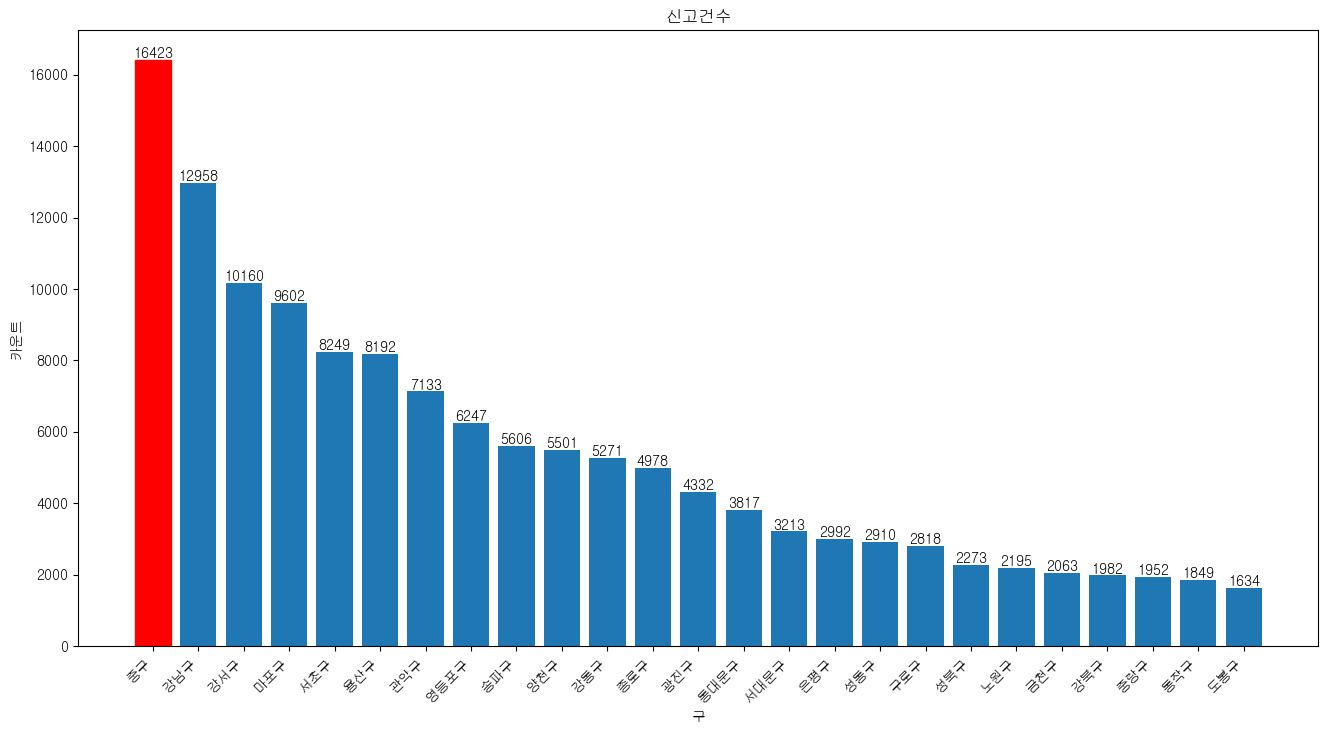

In [23]:
import matplotlib.pyplot as plt

# 오류 방지
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐
plt.rcParams['font.family'] = 'Gulim'

plt.figure(figsize=(16,8))
bars =  plt.bar(df_seoul['index'], df_seoul['구'])
plt.xlabel('구')
plt.ylabel('카운트')
plt.title('신고건수')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
    
    
    
max_count = max(df_seoul['구'])
for bar in bars:
    if bar.get_height() == max_count:
        bar.set_color('red')    

    
plt.show()

---

# 05. 서울 자치구 중에서 신고건수가 비교적 높은 '중구' 선정하여 EDA 진행

## 5-1. 평일과 주말

In [24]:
df.head()

,민원접수일,민원접수시간,시,구,도로1,year,month,day
0,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
1,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
2,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
3,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1
4,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1


In [25]:
# 서울지역 평일/주말 컬럼 생성

df['평일/주말'] = df['민원접수일'].dt.dayofweek
df['평일/주말'] = df['평일/주말'].apply(lambda x: '주말' if x >= 5 else '평일')
df

,민원접수일,민원접수시간,시,구,도로1,year,month,day,평일/주말
0,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말
1,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말
2,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말
3,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말
4,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말
...,...,...,...,...,...,...,...,...,...
134529,2023-10-31,23:55:00,서울특별시,용산구,한남대로20길,2023,10,31,평일
134530,2023-10-31,23:56:00,서울특별시,양천구,목동중앙서로7나길,2023,10,31,평일
134531,2023-10-31,23:59:00,서울특별시,서초구,반포대로,2023,10,31,평일
134532,2023-10-31,23:59:00,서울특별시,서초구,신반포로23길,2023,10,31,평일


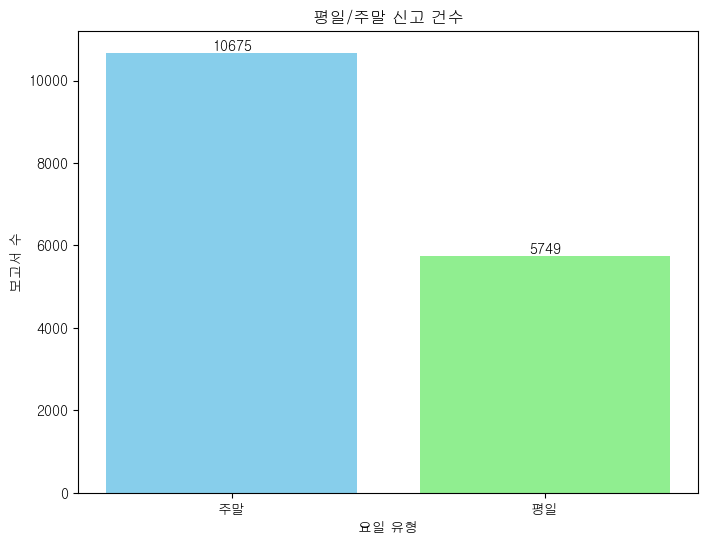

In [32]:
# 서울 중구지역 그룹화, 신고 건수 
df_junggu = df[df['구'] == '중구']
reports_by_daytype = df_junggu.groupby('평일/주말')['민원접수시간'].count()

# 시각화
plt.figure(figsize=(8, 6))

bars = plt.bar(reports_by_daytype.index, reports_by_daytype.values, color=['skyblue', 'lightgreen'])

plt.xlabel('요일 유형')
plt.ylabel('보고서 수')
plt.title('평일/주말 신고 건수')
plt.xticks(rotation=0)


#  텍스트 x, y좌표 
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.show()

---

## 5-2. 요일별 현황

In [33]:
# 요일 컬럼생성
df['요일'] = df['민원접수일'].dt.day_name()
df

,민원접수일,민원접수시간,시,구,도로1,year,month,day,평일/주말,요일
0,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
1,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
2,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
3,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
4,2023-10-01,0:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
...,...,...,...,...,...,...,...,...,...,...
134529,2023-10-31,23:55:00,서울특별시,용산구,한남대로20길,2023,10,31,평일,Tuesday
134530,2023-10-31,23:56:00,서울특별시,양천구,목동중앙서로7나길,2023,10,31,평일,Tuesday
134531,2023-10-31,23:59:00,서울특별시,서초구,반포대로,2023,10,31,평일,Tuesday
134532,2023-10-31,23:59:00,서울특별시,서초구,신반포로23길,2023,10,31,평일,Tuesday


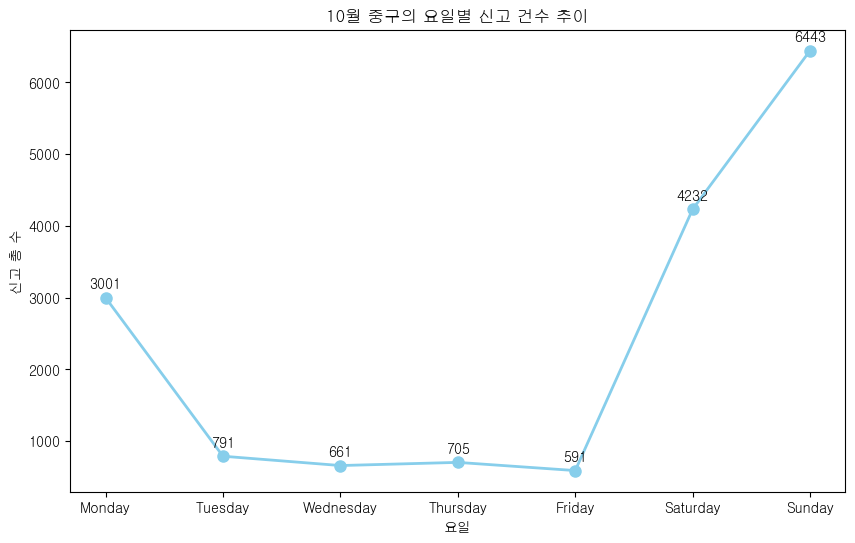

In [35]:
# 그룹화 
df_junggu = df[df['구'] == '중구']
parking_reports_by_day = df_junggu.groupby('요일')['민원접수시간'].size() # size: null포함 / count: 미포함

# 인덱스 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
parking_reports_by_day = parking_reports_by_day.reindex(day_order, fill_value=0)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(day_order, parking_reports_by_day, marker='o', color='skyblue', linewidth=2, markersize=8)
plt.xlabel('요일')
plt.ylabel('신고 총 수')
plt.title('10월 중구의 요일별 신고 건수 추이')


for x, y in zip(day_order, parking_reports_by_day):
    plt.text(x, y+100, str(y), ha='center', va='bottom', fontsize=10)


plt.show()

---

## 5-3. 10월 주차별 현황

In [36]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
parking_reports_by_day = parking_reports_by_day.reindex(day_order, fill_value=0)

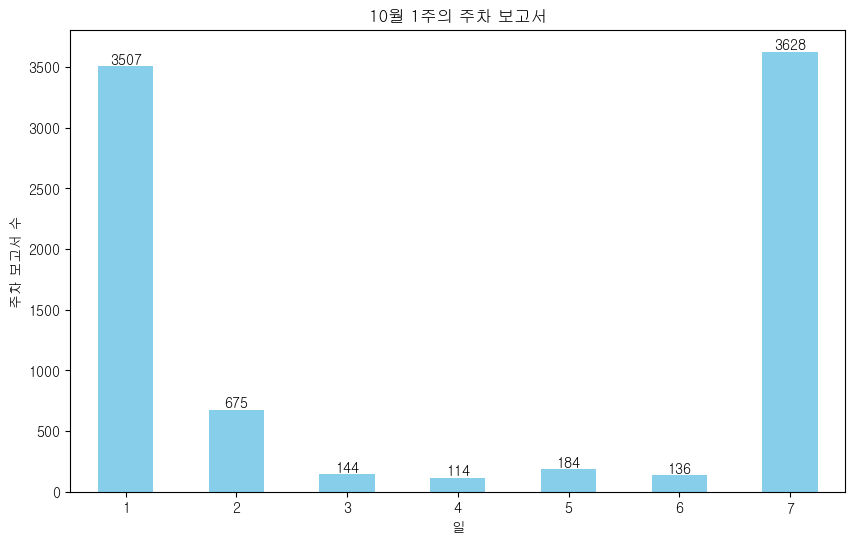

In [39]:
def plot_weekly_parking_reports(df, month, week_num):

    # 데이터의 첫 번째 날과 마지막 날을 확인
    first_day = df_junggu['day'].min()
    last_day = df_junggu['day'].max()
    

    # 요청된 주차의 시작 날짜찾기
    start_day = first_day + (week_num - 1) * 7

    # 요청된 주차의 데이터를 추출
    week_data = df_junggu[(df_junggu['day'] >= start_day) & (df_junggu['day'] < start_day + 7)]
    
#    if week_data.empty:
#        print(f"{month}월 {week_num}주차에 대한 데이터가 없습니다.")
#        return

    # 주차 별 주차 보고서 수를 계산
    parking_reports_by_day = week_data.groupby('day')['민원접수시간'].count()

    # 그래프를 생성
    plt.figure(figsize=(10, 6))
    parking_reports_by_day.plot(kind='bar', color='skyblue')
#    plt.plot(day_order, parking_reports_by_day, marker='o', color='skyblue', linewidth=2, markersize=8)
    plt.xlabel('일')
    plt.ylabel('주차 보고서 수')
    plt.title(f'{month}월 {week_num}주의 주차 보고서')
    plt.xticks(range(7), [start_day + i for i in range(7)], rotation=0) 
    
    for i, v in enumerate(parking_reports_by_day):
        plt.text(i, v, str(v), ha='center', va='bottom')


#    plt.xticks(rotation=45, ha='right')
#    x_labels = [f'{day}, Week {int((current_day - first_day) / 7) + 1}' for day in parking_reports_by_day.index]
#    plt.gca().set_xticklabels(x_labels)      

    plt.show()

    
# 함수 호출하여 첫 번째 주와 두 번째 주의 주차 보고서를 시각화
plot_weekly_parking_reports(df_junggu, 10, 1)

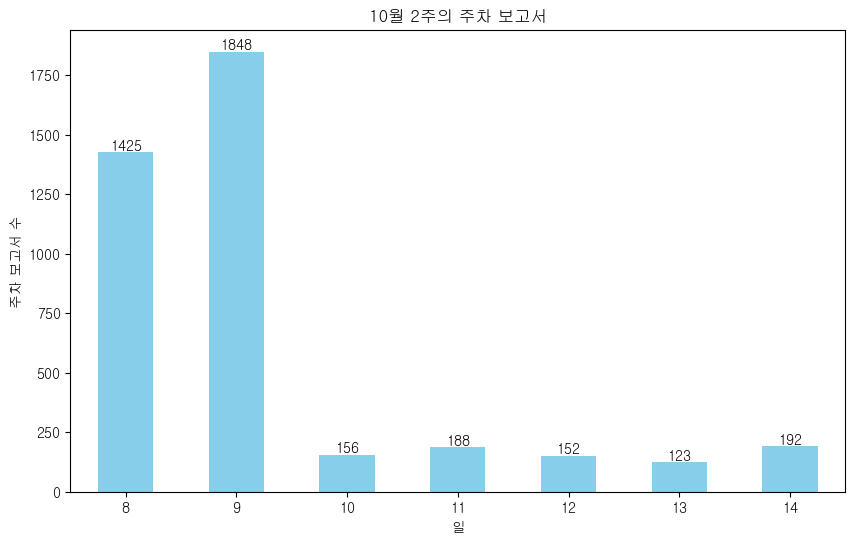

In [40]:
plot_weekly_parking_reports(df_junggu, 10, 2)

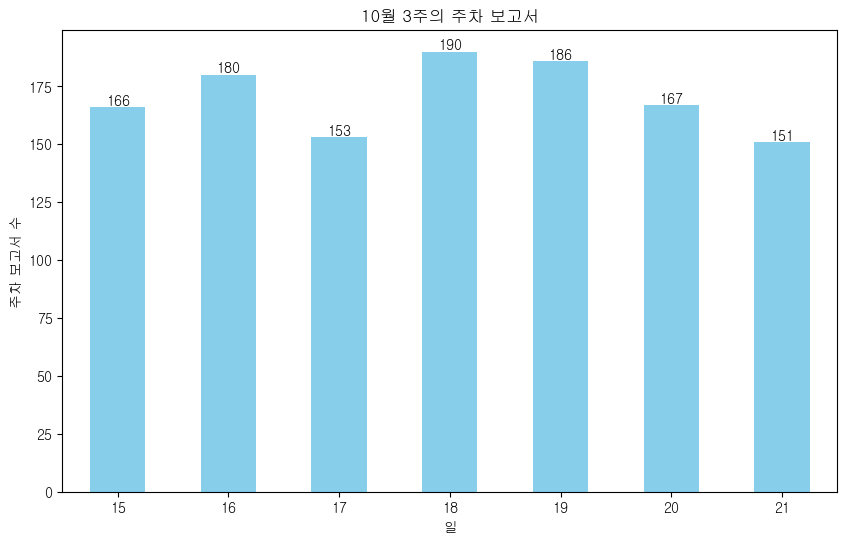

In [41]:
plot_weekly_parking_reports(df_junggu, 10, 3)

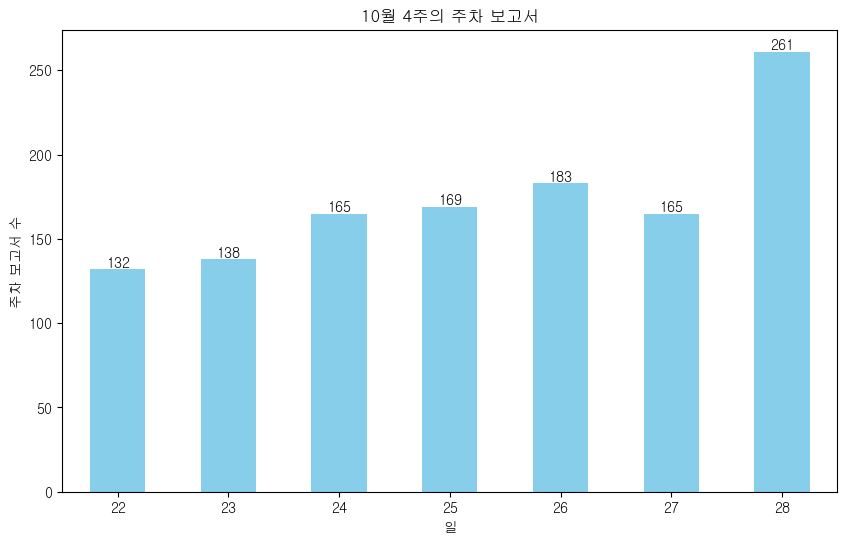

In [42]:
plot_weekly_parking_reports(df_junggu, 10, 4)

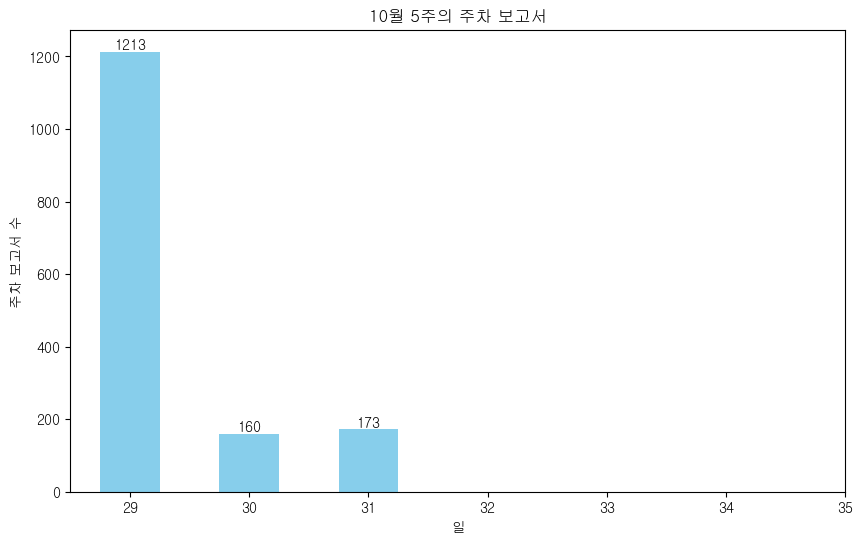

In [43]:
plot_weekly_parking_reports(df_junggu, 10, 5)

---

## 5-4. 시간별 건수

In [45]:
df['민원접수시간'] = pd.to_datetime(df['민원접수시간'], format='%H:%M:%S')

df['hour'] = df['민원접수시간'].dt.hour
df['minute'] = df['민원접수시간'].dt.minute

,민원접수일,민원접수시간,시,구,도로1,year,month,day,평일/주말,요일
0,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
1,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
2,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
3,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
4,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday
...,...,...,...,...,...,...,...,...,...,...
134529,2023-10-31,1900-01-01 23:55:00,서울특별시,용산구,한남대로20길,2023,10,31,평일,Tuesday
134530,2023-10-31,1900-01-01 23:56:00,서울특별시,양천구,목동중앙서로7나길,2023,10,31,평일,Tuesday
134531,2023-10-31,1900-01-01 23:59:00,서울특별시,서초구,반포대로,2023,10,31,평일,Tuesday
134532,2023-10-31,1900-01-01 23:59:00,서울특별시,서초구,신반포로23길,2023,10,31,평일,Tuesday


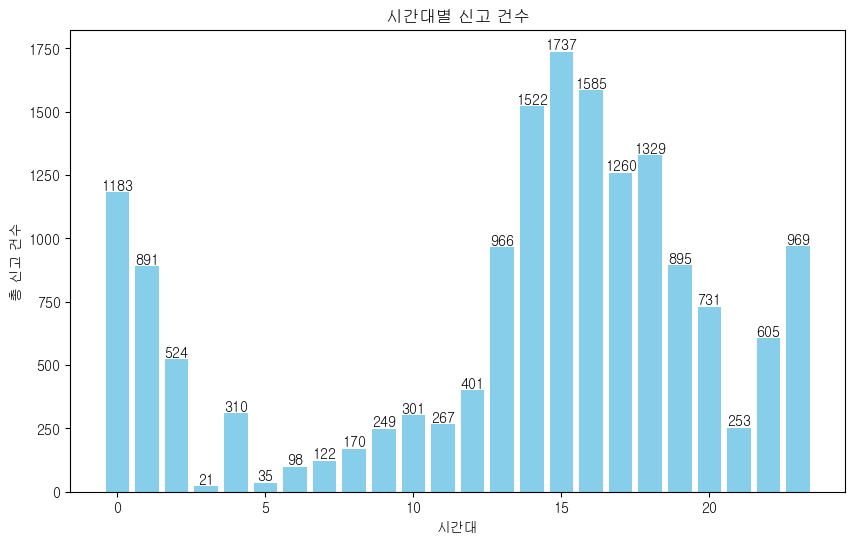

In [50]:
df_junggu = df[df['구'] == '중구']

hourly_counts  = df_junggu.groupby('hour')['민원접수시간'].size()
hourly_counts = hourly_counts.reset_index(name='count')

plt.figure(figsize=(10, 6))

# hourly_counts.plot(kind='bar', color='skyblue')
bars = plt.bar(hourly_counts['hour'], hourly_counts['count'], color='skyblue')

plt.xlabel('시간대')
plt.ylabel('총 신고 건수')
plt.title('시간대별 신고 건수')


bars = plt.bar(hourly_counts['hour'], hourly_counts['count'], color='skyblue')

# Add count value annotations to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')


plt.show()

# 5-5. 20분단위로 그룹화 후  신고건수 확인

In [52]:
# 구간을 정의
bins = [0, 20, 40, 60]

# 구간에 대한 레이블을 정의
labels = ['00~19', '20~39', '40~59']

# pd.cut()을 사용하여 분을 구간으로 나누기
sections = pd.cut(df_junggu['minute'], bins=bins, labels=labels, right=False)

# 새로운 열로 구간을 DataFrame에 추가
df_junggu['Minute Section'] = sections

df_junggu.groupby(['hour','Minute Section'])['민원접수시간'].size()
df_junggu

,민원접수일,민원접수시간,시,구,도로1,year,month,day,평일/주말,요일,hour,minute,Minute Section
0,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday,0,0,00~19
1,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday,0,0,00~19
2,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday,0,0,00~19
3,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday,0,0,00~19
4,2023-10-01,1900-01-01 00:00:00,서울특별시,중구,회현동1가,2023,10,1,주말,Sunday,0,0,00~19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134414,2023-10-31,1900-01-01 23:03:00,서울특별시,중구,광희동2가,2023,10,31,평일,Tuesday,23,3,00~19
134454,2023-10-31,1900-01-01 23:19:00,서울특별시,중구,다산로39길,2023,10,31,평일,Tuesday,23,19,00~19
134462,2023-10-31,1900-01-01 23:20:00,서울특별시,중구,을지로6가,2023,10,31,평일,Tuesday,23,20,20~39
134517,2023-10-31,1900-01-01 23:44:00,서울특별시,중구,청구로3길,2023,10,31,평일,Tuesday,23,44,40~59


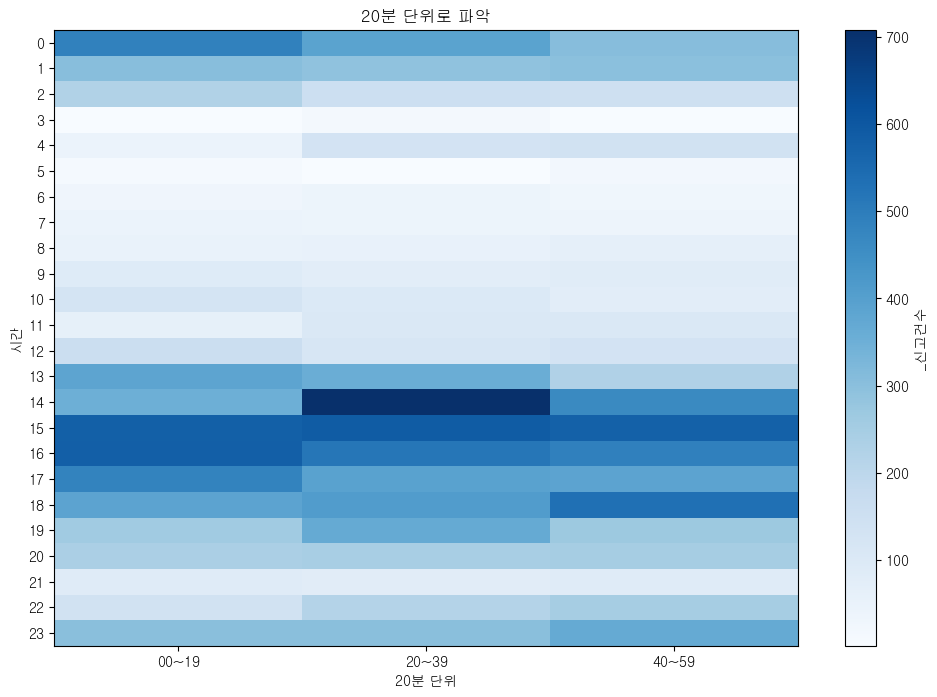

In [53]:
grouped_data = df_junggu.groupby(['hour', 'Minute Section'])['민원접수시간'].size().unstack()

plt.figure(figsize=(12, 8))
heatmap = plt.imshow(grouped_data, cmap='Blues', aspect='auto')

plt.xlabel('20분 단위')
plt.ylabel('시간')

# colorbar를 추가
plt.colorbar(heatmap, label='_신고건수')

plt.title('20분 단위로 파악')

# x축과 y축 눈금을 설정
plt.xticks(range(len(grouped_data.columns)), grouped_data.columns)
plt.yticks(range(len(grouped_data.index)), grouped_data.index)

plt.show()

---

## 5-6. 평일/주말 시간대 확인

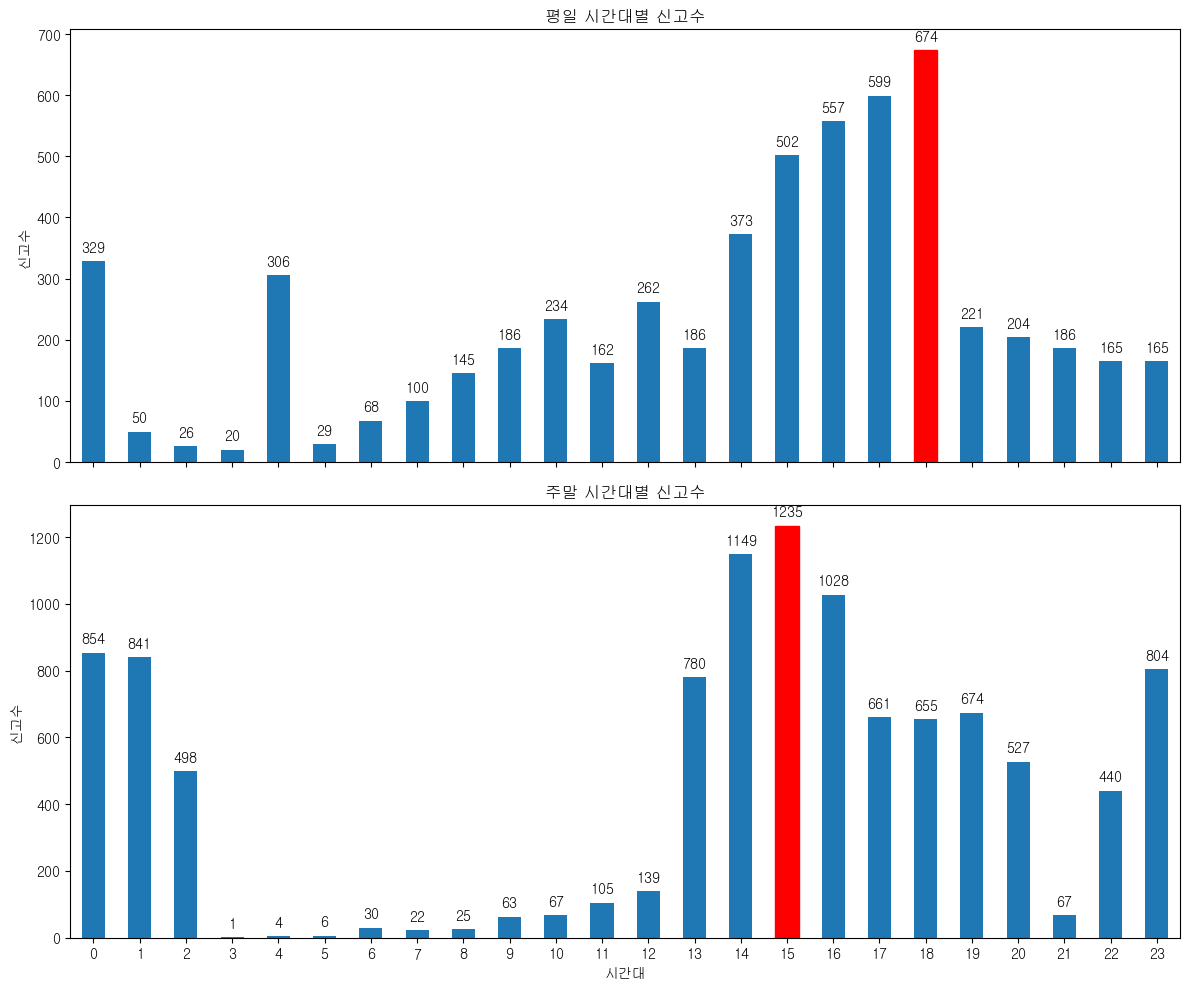

In [55]:
hourly_cases2 = df_junggu.groupby(['평일/주말','hour'])['민원접수시간'].size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# 주중 데이터에 대한 막대 그래프를 생성하고 사례 수를 표시
max_cases_weekday = hourly_cases2.loc['평일'].max()  # 주중의 최대 사례 수를 찾기
weekday_bars = hourly_cases2.loc['평일'].plot(kind='bar', stacked=True, ax=axes[0])
for p in weekday_bars.patches:
    if p.get_height() == max_cases_weekday:
        p.set_color('red')  # 최대 사례 수를 가진 막대를 빨간색으로 지정
    axes[0].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[0].set_title('평일 시간대별 신고수')
axes[0].set_ylabel('신고수')
# axes[0].grid(axis='y')



# 주말 데이터에 대한 막대 그래프를 생성하고 사례 수를 표시
max_cases_weekend = hourly_cases2.loc['주말'].max()  # 주말의 최대 사례 수를 찾기
weekend_bars = hourly_cases2.loc['주말'].plot(kind='bar', stacked=True, ax=axes[1])
for p in weekend_bars.patches:
    if p.get_height() == max_cases_weekend:
        p.set_color('red')  # 최대 사례 수를 가진 막대를 빨간색으로 지정
    axes[1].annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
axes[1].set_title('주말 시간대별 신고수')
axes[1].set_xlabel('시간대')
axes[1].set_ylabel('신고수')
# axes[1].grid(axis='y')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

---

## 5-7. 행정동별 건수

In [57]:
df_junggu_dong = df_junggu.groupby('도로1')['민원접수시간'].count()

df_junggu_dong_sorted = df_junggu_dong.sort_values(ascending=False)

df_junggu_dong_sorted_top = df_junggu_dong_sorted.head(5)

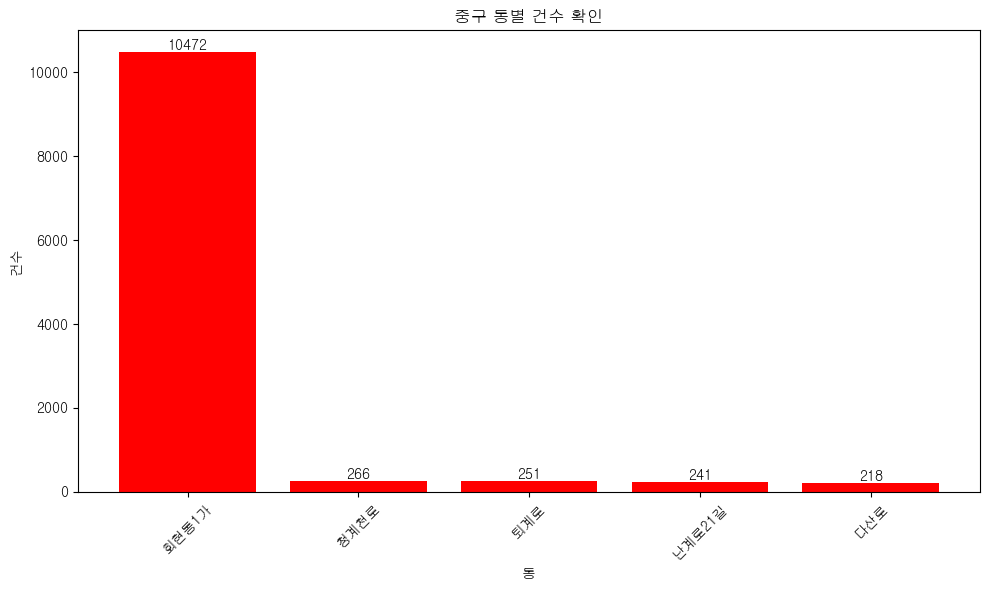

In [58]:
plt.figure(figsize=(10,6))
bars = plt.bar(df_junggu_dong_sorted_top.index, df_junggu_dong_sorted_top.values, color='red')

plt.xlabel('동')
plt.ylabel('건수')
plt.title('중구 동별 건수 확인')
plt.xticks(rotation=45, ha='center')
# plt.grid(True)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+ bar.get_width()/2,yval, round(yval, 1), va='bottom', ha='center' )


    
plt.tight_layout()
plt.show()